# PHASE 2 - Digit Picture Classification Using Random Forest Algorithm
---
---
---

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

---
---
## 2. Data Loading

In [2]:
features_path = 'E:\\University Semester\\6\\Foundation of Computational Intelligence\\Projects\\S3. Project Phase 2\\Features'
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['features'], data['domains'], data['digits']

features_train, domains_train, digits_train = load_data(features_path + '\\train_data.npz')
print("Train Shape:", features_train.shape)
print("Train Domains:", np.unique(domains_train, return_counts=True))
print("Train Digits:", np.unique(digits_train, return_counts=True))

print()

features_test, domains_test, digits_test = load_data(features_path + '\\test_data.npz')
print("Test Shape:", features_test.shape)
print("Test Domains:", np.unique(domains_test, return_counts=True))
print("Test Digits:", np.unique(digits_test, return_counts=True))

Train Shape: (25000, 1024)
Train Domains: (array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))
Train Digits: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([2715, 3324, 2717, 2595, 2502, 2165, 2370, 2277, 2184, 2151],
      dtype=int64))

Test Shape: (25000, 1024)
Test Domains: (array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))
Test Digits: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([2655, 3341, 2719, 2478, 2362, 2342, 2310, 2373, 2162, 2258],
      dtype=int64))


---
---
## 3. Finding Best Random Forest Classification

### This function will plot the relationship between accuracy and max depth of trees in RFC.
### We can test and plot more diagrams to find best hyper parameters like (n_estimators and so on) but it works fine right now!

In [3]:
def best_rfc(train_data, train_label, test_data, test_label):
    train_accuracy = []
    test_accuracy = []
    for depth in range(4, 25, 4):
        rfc = RandomForestClassifier(max_depth=depth, random_state=0)
        rfc.fit(train_data, train_label)
        train_predict = rfc.predict(train_data)
        test_predict = rfc.predict(test_data)
        train_accuracy.append(accuracy_score(train_predict, train_label))
        test_accuracy.append(accuracy_score(test_predict, test_label))
    plt.plot(range(4, 25, 4), train_accuracy, label="Train")
    plt.plot(range(4, 25, 4), test_accuracy, label="Test")
    plt.legend()
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')

---
---
## 4. Digit Classification

### Finding best RFC for digit classification, As we see after max_depth=12 there is no much improvement with increasing depth, so we choose 12.

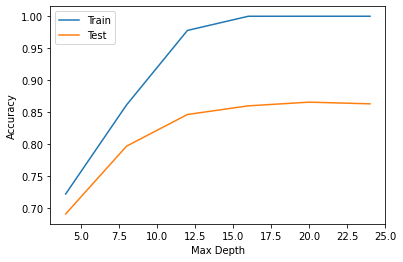

In [4]:
best_rfc(features_train, digits_train, features_test, digits_test)

### RFC with max_depth = 12, accuracy score and confusion matrix.

In [5]:
digit_rfc = RandomForestClassifier(n_estimators=130, max_depth=12)
digit_rfc.fit(features_train, digits_train)
digit_test_predict = digit_rfc.predict(features_test)
digit_classification_accuracy = accuracy_score(digit_test_predict, digits_test)
digit_classification_confusion_matrix = confusion_matrix(digit_test_predict, digits_test)
print("Accuracy Score:", digit_classification_accuracy)
print("Confusion Matrix, Vertical numbers are true labels and horizontal ones are predicted labels.")
print(pd.DataFrame(digit_classification_confusion_matrix))

Accuracy Score: 0.8516
Confusion Matrix, Vertical numbers are true labels and horizontal ones are predicted labels.
      0     1     2     3     4     5     6     7     8     9
0  2311     5     9     9     6     7    40     5    26    53
1   146  3109    86    87   147    37    96   157   115    59
2    75    74  2518    90    47    38    39    86    98   118
3    32    26    33  2114    15   144    33    18   165    93
4    20    45    28    25  2071    31    49    18    35   122
5    12     9     5    75     4  2009   137    10    65    42
6    20     2    10     7    17    37  1859     2    48     6
7     9    57    18    17    14    11     2  2039     9    51
8    23    11     7    45     7    19    51     9  1586    40
9     7     3     5     9    34     9     4    29    15  1674


---
---
## 5. Domain Classification

### Finding best RFC for domain classification, As we see after max_depth=8 there is no much improvement with increasing depth, so we choose 8.

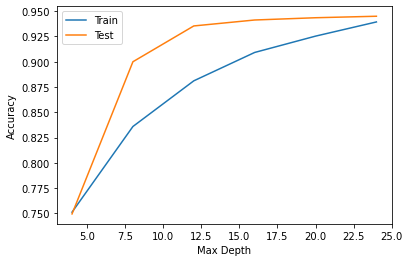

In [6]:
best_rfc(features_train, domains_train, features_test, domains_test)

### RFC with max_depth = 8, accuracy score and confusion matrix.

In [7]:
domain_rfc = RandomForestClassifier(max_depth=8)
domain_rfc.fit(features_train, domains_train)
domain_train_predict = domain_rfc.predict(features_train)
domain_test_predict = domain_rfc.predict(features_test)
domain_classification_accuracy = accuracy_score(domain_test_predict, domains_test)
digit_classification_confusion_matrix = confusion_matrix(domain_test_predict, domains_test)
print("Accuracy Score:", domain_classification_accuracy)
print("Confusion Matrix, Vertical numbers are true labels and horizontal ones are predicted labels.")
print(pd.DataFrame(digit_classification_confusion_matrix))

Accuracy Score: 0.8998
Confusion Matrix, Vertical numbers are true labels and horizontal ones are predicted labels.
      0     1     2     3     4
0  4993    69     0    95    12
1     3  4528   112   773     1
2     0   351  4839   790     0
3     2    51    48  3149     1
4     2     1     1   193  4986


---
---
## 6. Domain Specific Classification

### Splitting data by predicted domain using RFC trained by domains.

In [8]:
train_data_separate_by_domains = [[], [], [], [], []]
train_digits_separate_by_domains = [[], [], [], [], []]
test_data_separate_by_domains = [[], [], [], [], []]
test_digits_separate_by_domains = [[], [], [], [], []]

for index in range(len(features_train)):
    train_data_separate_by_domains[domain_train_predict[index]].append(features_train[index])
    train_digits_separate_by_domains[domain_train_predict[index]].append(digits_train[index])
    
for index in range(len(features_test)):
    test_data_separate_by_domains[domain_test_predict[index]].append(features_test[index])
    test_digits_separate_by_domains[domain_test_predict[index]].append(digits_test[index])

### We can find best RFC specific for domains but it works fine already!

In [9]:
# best_rfc(train_data_separate_by_domains[0], train_digits_separate_by_domains[0], 
#          test_data_separate_by_domains[0], test_digits_separate_by_domains[0])
# best_rfc(train_data_separate_by_domains[1], train_digits_separate_by_domains[1], 
#          test_data_separate_by_domains[1], test_digits_separate_by_domains[1])
# best_rfc(train_data_separate_by_domains[2], train_digits_separate_by_domains[2], 
#          test_data_separate_by_domains[2], test_digits_separate_by_domains[2])
# best_rfc(train_data_separate_by_domains[3], train_digits_separate_by_domains[3], 
#          test_data_separate_by_domains[3], test_digits_separate_by_domains[3])
# best_rfc(train_data_separate_by_domains[4], train_digits_separate_by_domains[4], 
#          test_data_separate_by_domains[4], test_digits_separate_by_domains[4])

### Domain specific RFC with max_depth = 8, accuracy_score.

In [10]:
domain_specific_rfcs = []
domain_specific_test_predicts = []
domain_specific_classification_accuracies = []
domain_sample_counter = []

for domain in test_data_separate_by_domains:
    domain_sample_counter.append(len(domain))
    
for domain in range(5):
    domain_specific_rfcs.append(RandomForestClassifier(n_estimators=130, max_depth=8))
    domain_specific_rfcs[domain].fit(train_data_separate_by_domains[domain], train_digits_separate_by_domains[domain])
    domain_specific_test_predicts.append(domain_specific_rfcs[domain].predict(test_data_separate_by_domains[domain]))
    domain_specific_classification_accuracies.append(accuracy_score(domain_specific_test_predicts[domain], test_digits_separate_by_domains[domain]))
    print("Domain", domain, "with", domain_sample_counter[domain], "samples accuracy:" , domain_specific_classification_accuracies[domain])

Domain 0 with 5169 samples accuracy: 0.9603404913909848
Domain 1 with 5417 samples accuracy: 0.7974893852685988
Domain 2 with 5980 samples accuracy: 0.7066889632107023
Domain 3 with 3251 samples accuracy: 0.8649646262688404
Domain 4 with 5183 samples accuracy: 0.9679722168628208


---
---
## 7. Domain Specific Classification Using Other Domains Data 

### Due to confusion matrix 15% of second domain misclassified to forth domain, so we add part of forth domain for training.

In [11]:
domain_specific_rfcs[1] = RandomForestClassifier(n_estimators=130, max_depth=8)
learn_data = train_data_separate_by_domains[1] + train_data_separate_by_domains[3][0:1500]
learn_label = train_digits_separate_by_domains[1] + train_digits_separate_by_domains[3][0:1500]
domain_specific_rfcs[1].fit(learn_data, learn_label)
domain_specific_test_predicts[1] = domain_specific_rfcs[1].predict(test_data_separate_by_domains[1])
domain_specific_classification_accuracies[1] = accuracy_score(domain_specific_test_predicts[1], test_digits_separate_by_domains[1])
print("Domain 1 new accuracy:", domain_specific_classification_accuracies[1])

Domain 1 new accuracy: 0.8218571164851394


### Due to confusion matrix 15% of third domain misclassified to forth domain, so we add part of forth domain for training.

In [12]:
domain_specific_rfcs[2] = RandomForestClassifier(n_estimators=130, max_depth=8)
learn_data = train_data_separate_by_domains[2] + train_data_separate_by_domains[3][0:1500]
learn_label = train_digits_separate_by_domains[2] + train_digits_separate_by_domains[3][0:1500]
domain_specific_rfcs[2].fit(learn_data, learn_label)
domain_specific_test_predicts[2] = domain_specific_rfcs[2].predict(test_data_separate_by_domains[2])
domain_specific_classification_accuracies[2] = accuracy_score(domain_specific_test_predicts[2], test_digits_separate_by_domains[2])
print("Domain 2 new accuracy:", domain_specific_classification_accuracies[2])

Domain 2 new accuracy: 0.7168896321070234


### As we see adding other domains data improved accuracy.
---
---
## 8. Results

In [13]:
print("Simple Digit Classification Accuracy:", digit_classification_accuracy)
print("Simple Domain Classification Accuracy:", domain_classification_accuracy)
print("Average Domain Specific Classification Accuracy:", np.average(domain_specific_classification_accuracies, weights=domain_sample_counter))

Simple Digit Classification Accuracy: 0.8516
Simple Domain Classification Accuracy: 0.8998
Average Domain Specific Classification Accuracy: 0.86128
